# IMPORTING LIBRARIES

In [138]:
#import library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from imblearn.over_sampling import SMOTE
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

# IMPORTING DATA

In [139]:
dataset = pd.read_csv('CH.csv')

**CONSIDERING ONLY THE SUBSET OF THE GIVEN DATASET i.e DATA COLLECTED IN 2016 & 2017.**

In [140]:
dataset['CreatedDate'] = pd.to_datetime(dataset['CreatedDate'])
dataset = dataset.set_index(dataset['CreatedDate'])
dataset = dataset.sort_index()

In [141]:
data = dataset['2016-01-01':'2018-01-01']

In [142]:
data = data.drop('CreatedDate', axis = 1)

In [143]:
data = data.reset_index('CreatedDate')
#data.head(10)

# DATA CLEANING + EDA

In [144]:
#check the lable info
print(data['HighRisk'].value_counts())
print(data['EmergencyReferral'].value_counts())

NO     144903
YES      5238
Name: HighRisk, dtype: int64
NO     149950
YES       191
Name: EmergencyReferral, dtype: int64


In [145]:
#check how many rows * columns
print(data.shape)

(151478, 72)


In [146]:
#remove all the missing value in Highrisk

data[['EmergencyReferral','HighRisk']].isnull().sum()

EmergencyReferral    1337
HighRisk             1337
dtype: int64

In [147]:
data[['EmergencyReferral','HighRisk']]

,EmergencyReferral,HighRisk
0,NO,NO
1,NO,NO
2,NO,NO
3,NO,NO
4,NO,YES
...,...,...
151473,NO,NO
151474,NO,NO
151475,NO,NO
151476,NO,NO


**NUMBER OF UNIQUE PATIENT ID**

In [148]:
print("The number of unique patient is ")
len(data["PatientID"].unique())

The number of unique patient is 


119020

In [149]:
df_temp1=data
import time
start = time.time()
dicts = {}
num_keys = range(len(df_temp1["PatientID"].unique()))
values =list(df_temp1["PatientID"].unique())
for i in num_keys:
    #print(values[i])
    dicts[i] = values[i]
#print(dicts)
end = time. time()
print(end - start)

0.0536036491394043


In [150]:
# Check the different for PID
#data.iloc[:5,:23]

data.iloc[:5, 2:23]

,PatientID,AgeGroup,State,ZipCode,Gender,Age,Fasting,GLU,A1c,SBP,DBP,TCHOL,TC:HDL_RATIO,LDL,HDL,TGS,AbdominalCir,HEIGHT,WEIGHT,BMI,ALT
0,119883,60 - 69,OK,74158,F,67,YES,96.0,5.4,133.0,65.0,210.0,2.8,113.0,74.0,116.0,40.0,61.0,205.0,38.4,28.0
1,119882,18 - 39,OK,74105,F,32,YES,94.0,5.1,126.0,88.0,231.0,3.4,141.0,68.0,108.0,32.0,67.0,171.0,26.8,25.0
2,119938,18 - 39,OK,74037,M,34,YES,82.0,4.8,134.0,80.0,255.0,3.8,139.0,67.0,242.0,35.0,70.0,177.0,25.2,33.0
3,120179,40 - 49,OK,74021,F,44,YES,85.0,5.3,138.0,79.0,230.0,3.8,148.0,61.0,104.0,39.0,66.0,186.0,30.0,18.0
4,119896,40 - 49,OK,74012,M,42,NO,98.0,5.0,142.0,100.0,217.0,3.8,110.0,56.0,252.0,34.0,64.0,137.0,23.3,25.0


In [151]:
# Check the different for PID
data.iloc[:5,23:43]

,AST,METS_Risks,COTININE,BPAssessment,DyslipidemiaStatus,HDLAssessment,LDLAssessment,TGSAssessment,DMAssessment,DiabetesStatusUsingGlucose,DiabetesStatusUsingA1c,BMIAssessment,AbdominalCircumferenceStatus,PrimaryCareProvider,Smoking,SmokelessTobacco,Activity,Mammography,PapSmear,ClinicalBreastExam
0,27.0,2,NaN,CONTROLLED,2,VERY GOOD,CONTROLLED,NORMAL,NORMAL,NORMAL,NORMAL,OBESITY,HIGH RISK,YES,NEVER,NEVER,YES,YES,YES,YES
1,21.0,1,NaN,HYPERTENSION STG1,1,VERY GOOD,BORDERLINE HIGH,NORMAL,NORMAL,NORMAL,NORMAL,OVERWEIGHT,NORMAL,YES,NEVER,NEVER,YES,NaN,YES,YES
2,41.0,2,NaN,CONTROLLED,1,VERY GOOD,BORDERLINE HIGH,HIGH,NORMAL,NORMAL,NORMAL,OVERWEIGHT,NORMAL,YES,QUIT,NEVER,YES,NaN,NaN,NaN
3,21.0,2,NaN,HYPERTENSION STG1,1,VERY GOOD,BORDERLINE HIGH,NORMAL,NORMAL,NORMAL,NORMAL,OBESITY,HIGH RISK,YES,NEVER,NEVER,NO,YES,NO,NO
4,32.0,-1,NaN,HYPERTENSION STG2,0,NOT FASTING,NOT FASTING,NOT FASTING,NaN,NOT FASTING,NORMAL,NORMAL,NORMAL,YES,NEVER,NEVER,YES,NaN,NaN,NaN


In [152]:
inv_map = {v: k for k, v in dicts.items()}
df_temp1["PatientID"]=df_temp1["PatientID"].map(inv_map)

In [153]:
df_temp1.head()

,CreatedDate,CompanyName,PatientID,AgeGroup,State,ZipCode,Gender,Age,Fasting,GLU,A1c,SBP,DBP,TCHOL,TC:HDL_RATIO,LDL,HDL,TGS,AbdominalCir,HEIGHT,WEIGHT,BMI,ALT,AST,METS_Risks,COTININE,BPAssessment,DyslipidemiaStatus,HDLAssessment,LDLAssessment,TGSAssessment,DMAssessment,DiabetesStatusUsingGlucose,DiabetesStatusUsingA1c,BMIAssessment,AbdominalCircumferenceStatus,PrimaryCareProvider,Smoking,SmokelessTobacco,Activity,Mammography,PapSmear,ClinicalBreastExam,ColorectalExam,Alcohol,HypertensionHistory,DiabetesHistory,DiabetesDuringPregnancyHistory,CoronaryArteryHistory,HighCholesterolHistory,DaytimeFatigueHistory,SnoringHistory,AsthmaHistory,HeartFailureHistory,KidneyHistory,StrokeHistory,COPDHistory,HeartDiseaseHistory,HypertensionMedication,DiabetesMedication,CholesterolMedication,NewlyAssessedHypertension,NewlyAssessedDyslipidemia,NewlyAssessedDiabetes,EmergencyReferral,HighRisk,DiabetesPreventionProgram,COPDProgram,CoronaryArteryDiseaseProgram,DiabetesProgram,HeartFailureProgram,AsthmaProgram
0,2016-01-05,PennWell Publishing Company,0,60 - 69,OK,74158,F,67,YES,96.0,5.4,133.0,65.0,210.0,2.8,113.0,74.0,116.0,40.0,61.0,205.0,38.4,28.0,27.0,2,NaN,CONTROLLED,2,VERY GOOD,CONTROLLED,NORMAL,NORMAL,NORMAL,NORMAL,OBESITY,HIGH RISK,YES,NEVER,NEVER,YES,YES,YES,YES,YES,NO,YES,NO,NO,NO,YES,NaN,NO,NO,NO,NO,NaN,NO,NO,YES,NO,YES,0,0,0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,PennWell Publishing Company,1,18 - 39,OK,74105,F,32,YES,94.0,5.1,126.0,88.0,231.0,3.4,141.0,68.0,108.0,32.0,67.0,171.0,26.8,25.0,21.0,1,NaN,HYPERTENSION STG1,1,VERY GOOD,BORDERLINE HIGH,NORMAL,NORMAL,NORMAL,NORMAL,OVERWEIGHT,NORMAL,YES,NEVER,NEVER,YES,NaN,YES,YES,NaN,NO,NO,NO,NO,NO,NO,NaN,NO,YES,NO,NO,NaN,NO,NO,NO,NaN,NaN,1,1,0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-05,PennWell Publishing Company,2,18 - 39,OK,74037,M,34,YES,82.0,4.8,134.0,80.0,255.0,3.8,139.0,67.0,242.0,35.0,70.0,177.0,25.2,33.0,41.0,2,NaN,CONTROLLED,1,VERY GOOD,BORDERLINE HIGH,HIGH,NORMAL,NORMAL,NORMAL,OVERWEIGHT,NORMAL,YES,QUIT,NEVER,YES,NaN,NaN,NaN,NaN,NO,YES,NO,NaN,NO,YES,NO,YES,NO,NO,NO,NaN,NO,NO,YES,NO,NO,0,0,0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-05,PennWell Publishing Company,3,40 - 49,OK,74021,F,44,YES,85.0,5.3,138.0,79.0,230.0,3.8,148.0,61.0,104.0,39.0,66.0,186.0,30.0,18.0,21.0,2,NaN,HYPERTENSION STG1,1,VERY GOOD,BORDERLINE HIGH,NORMAL,NORMAL,NORMAL,NORMAL,OBESITY,HIGH RISK,YES,NEVER,NEVER,NO,YES,NO,NO,NaN,NO,NO,NO,NO,NO,NO,NaN,NO,NO,NO,NO,NaN,NO,NO,NO,NO,NO,1,1,0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,PennWell Publishing Company,4,40 - 49,OK,74012,M,42,NO,98.0,5.0,142.0,100.0,217.0,3.8,110.0,56.0,252.0,34.0,64.0,137.0,23.3,25.0,32.0,-1,NaN,HYPERTENSION STG2,0,NOT FASTING,NOT FASTING,NOT FASTING,NaN,NOT FASTING,NORMAL,NORMAL,NORMAL,YES,NEVER,NEVER,YES,NaN,NaN,NaN,NaN,YES,NO,NO,NaN,NO,NO,NaN,NO,YES,NO,NO,NaN,NO,NO,NO,NO,NO,1,0,0,NO,YES,NaN,NaN,NaN,NaN,NaN,NaN


**CHECK THE CHECKUP DISTRIBUTION**

In [154]:
ct=pd.DataFrame(df_temp1["PatientID"].value_counts())
ct.reset_index(level=0, inplace=True)
ct.columns=["PatientID","Count"]

In [155]:
num_checkup=pd.DataFrame(ct["Count"].value_counts())
num_checkup

,Count
1,88022
2,29699
3,1156
4,128
5,12
6,3


**OUTPUT THE CHECKUP DISTRIBUTION**

In [156]:
num_checkup.to_csv('num_checkup_distribution.csv')

**OUTPUT THE DATASET WITH FAKE PATIENT ID**

In [157]:
df_temp1.to_csv('deidentified_pid.csv')

In [158]:
data = df_temp1.dropna(axis=0, subset=['EmergencyReferral','HighRisk'])

In [159]:
#Deidentified.csv is the file which stored the data without patient personal information 
#Remove the missing value in HighRisk column because I am going to build the classification model with Highrisk or EmergencyReferral as lable

data.to_csv('deidentified.csv')

**MAP THE ORIGINAL DATA INTO NUMERICAL DATA**

The mapping strategy is that if a feature means high risk, then the feature get high score.

In [160]:
data.columns

Index(['CreatedDate', 'CompanyName', 'PatientID', 'AgeGroup', 'State',
       'ZipCode', 'Gender', 'Age', 'Fasting', 'GLU', 'A1c', 'SBP', 'DBP',
       'TCHOL', 'TC:HDL_RATIO', 'LDL', 'HDL', 'TGS', 'AbdominalCir', 'HEIGHT',
       'WEIGHT', 'BMI', 'ALT', 'AST', 'METS_Risks', 'COTININE', 'BPAssessment',
       'DyslipidemiaStatus', 'HDLAssessment', 'LDLAssessment', 'TGSAssessment',
       'DMAssessment', 'DiabetesStatusUsingGlucose', 'DiabetesStatusUsingA1c',
       'BMIAssessment', 'AbdominalCircumferenceStatus', 'PrimaryCareProvider',
       'Smoking', 'SmokelessTobacco', 'Activity', 'Mammography', 'PapSmear',
       'ClinicalBreastExam', 'ColorectalExam', 'Alcohol',
       'HypertensionHistory', 'DiabetesHistory',
       'DiabetesDuringPregnancyHistory', 'CoronaryArteryHistory',
       'HighCholesterolHistory', 'DaytimeFatigueHistory', 'SnoringHistory',
       'AsthmaHistory', 'HeartFailureHistory', 'KidneyHistory',
       'StrokeHistory', 'COPDHistory', 'HeartDiseaseHistory',
      

**REMOVING USELESS COLUMNS FOR CLASSIFICATION**

In [161]:
data=data.drop(columns=['CompanyName','CreatedDate','ZipCode','PatientID','AgeGroup','State','PrimaryCareProvider',
                  'DiabetesPreventionProgram', 'COPDProgram',
       'CoronaryArteryDiseaseProgram', 'DiabetesProgram',
       'HeartFailureProgram', 'AsthmaProgram'])

In [162]:
data.columns

Index(['Gender', 'Age', 'Fasting', 'GLU', 'A1c', 'SBP', 'DBP', 'TCHOL',
       'TC:HDL_RATIO', 'LDL', 'HDL', 'TGS', 'AbdominalCir', 'HEIGHT', 'WEIGHT',
       'BMI', 'ALT', 'AST', 'METS_Risks', 'COTININE', 'BPAssessment',
       'DyslipidemiaStatus', 'HDLAssessment', 'LDLAssessment', 'TGSAssessment',
       'DMAssessment', 'DiabetesStatusUsingGlucose', 'DiabetesStatusUsingA1c',
       'BMIAssessment', 'AbdominalCircumferenceStatus', 'Smoking',
       'SmokelessTobacco', 'Activity', 'Mammography', 'PapSmear',
       'ClinicalBreastExam', 'ColorectalExam', 'Alcohol',
       'HypertensionHistory', 'DiabetesHistory',
       'DiabetesDuringPregnancyHistory', 'CoronaryArteryHistory',
       'HighCholesterolHistory', 'DaytimeFatigueHistory', 'SnoringHistory',
       'AsthmaHistory', 'HeartFailureHistory', 'KidneyHistory',
       'StrokeHistory', 'COPDHistory', 'HeartDiseaseHistory',
       'HypertensionMedication', 'DiabetesMedication', 'CholesterolMedication',
       'NewlyAssessedHypertensi

**FASTING**

In [163]:
# Because if the patient did not fast before the test, the result is not reliable.
# Strategy: Remove all rows with the not fasting value instead of mapping it into 1 or 0
#data["Fasting"]=data["Fasting"].map({'YES':1, 'NO':0})
data = data.drop(data[data["Fasting"]=='NO'].index)

In [164]:
# remove the missing value in Fasting.
data["Fasting"].value_counts()
data = data.drop(data[data["Fasting"].isnull()].index)

In [165]:
print(data["Fasting"].isnull().sum())

0


**SMOKING**

In [166]:
# There is no No option for 'Smoking','SmokelessTobacco'. Those records are anormal.
data = data.drop(data[data["Smoking"]=='NO'].index)
data = data.drop(data[data['SmokelessTobacco']=='NO'].index)
maps={'NEVER':0, 'QUIT':1, 'YES':2}
data["Smoking"]=data["Smoking"].map(maps)
data['SmokelessTobacco']=data['SmokelessTobacco'].map(maps)

In [167]:
print(data[['SmokelessTobacco','Smoking']].isnull().sum())

SmokelessTobacco    208
Smoking             151
dtype: int64


**ACTIVITY**

In [168]:
#There is no No option for 'Activity','Activity'. Those records are anormal. just remove it
#Since Activity is required quesiton for patient. There are only about 500 missing values.

data = data.drop(data[data["Activity"].isnull()].index)
maps={'YES':1, 'NO':0}
data["Activity"]=data["Activity"].map(maps)

In [169]:
print(data["Activity"].isnull().sum())

0


**ALCOHOL**

In [170]:
# alcohol -There are only about 500 missing value.
data = data.drop(data[data["Alcohol"].isnull()].index)
maps={'YES':1, 'NO':0}
data["Alcohol"]=data["Alcohol"].map(maps)
print(data["Alcohol"].isnull().sum())

0


**HYPERTENSION HISTORY**

In [171]:
#"HypertensionHistory" -There are only about 500 missing values.
data = data.drop(data[data["HypertensionHistory"].isnull()].index)
data["HypertensionHistory"]=data["HypertensionHistory"].map({'YES':1, 'NO':0})
print(data["HypertensionHistory"].isnull().sum())

0


**DIABETES HISTORY**

In [172]:
#"DiabetesHistory"-There are only about 500 missing values.
data = data.drop(data[data["DiabetesHistory"].isnull()].index)
data["DiabetesHistory"]=data["DiabetesHistory"].map({'YES':1, 'NO':0})
print(data["DiabetesHistory"].isnull().sum())

0


 **CORONARY ARTERY HISTORY**

In [173]:
#'CoronaryArteryHistory'-There are only about 500 missing values.
data = data.drop(data[data["CoronaryArteryHistory"].isnull()].index)
data["CoronaryArteryHistory"]=data["CoronaryArteryHistory"].map({'YES':1, 'NO':0})
print(data["CoronaryArteryHistory"].isnull().sum())

0


**HIGH CHOLESTROL HISTORY**

In [174]:
#'HighCholesterolHistory'-There are only about 600 missing values.
data = data.drop(data[data['HighCholesterolHistory'].isnull()].index)
data['HighCholesterolHistory']=data['HighCholesterolHistory'].map({'YES':1, 'NO':0})
print(data['HighCholesterolHistory'].isnull().sum())

0


**DAYTIME FATIGUE HISTORY, KIDNEY HISTORY, STROKE HISTORY**

In [175]:
# Since there are too many missing values in 'DaytimeFatigueHistory'(300K = nan),'KidneyHistory','StrokeHistory'
columns_miss = ['DaytimeFatigueHistory','KidneyHistory','StrokeHistory']
data=data.drop(columns=columns_miss)

In [176]:
data.isnull().sum()

Gender                                 0
Age                                    0
Fasting                                0
GLU                                   50
A1c                                87540
SBP                                   22
DBP                                   22
TCHOL                                 37
TC:HDL_RATIO                        3769
LDL                                 2926
HDL                                 2632
TGS                                  319
AbdominalCir                          59
HEIGHT                                22
WEIGHT                                21
BMI                                  340
ALT                                 1300
AST                                 1344
METS_Risks                             0
COTININE                          126313
BPAssessment                          44
DyslipidemiaStatus                     0
HDLAssessment                       2652
LDLAssessment                       2974
TGSAssessment   

**NEWLY ASSESED HYPERTENSION, NEWLY ASSESSED DYSLIPIDEMIA, NEWLY ASSESED DIABETES**

In [177]:
# Remove useless columns -NewlyAssessedHypertension,NewlyAssessedDyslipidemia,NewlyAssessedDiabetes
columns_newly = ['NewlyAssessedHypertension','NewlyAssessedDyslipidemia','NewlyAssessedDiabetes']
data=data.drop(columns=columns_newly)

In [178]:
data.isnull().sum()

Gender                                 0
Age                                    0
Fasting                                0
GLU                                   50
A1c                                87540
SBP                                   22
DBP                                   22
TCHOL                                 37
TC:HDL_RATIO                        3769
LDL                                 2926
HDL                                 2632
TGS                                  319
AbdominalCir                          59
HEIGHT                                22
WEIGHT                                21
BMI                                  340
ALT                                 1300
AST                                 1344
METS_Risks                             0
COTININE                          126313
BPAssessment                          44
DyslipidemiaStatus                     0
HDLAssessment                       2652
LDLAssessment                       2974
TGSAssessment   

**HEART DISEASE HISTORY**

In [179]:
#'HeartDiseaseHistory'-485=NAN
data = data.drop(data[data['HeartDiseaseHistory']==np.nan].index)
data['HeartDiseaseHistory']=data['HeartDiseaseHistory'].map({'YES':1, 'NO':0})
print(data['HeartDiseaseHistory'].isnull().sum())

0


**ASTHMA HISTORY**

In [180]:
#'SnoringHistory'-58575 missing since patients may not be able to detect sorning by themself. Remove the column
#'AsthmaHistory'-58539 missing since patients are able to detect asthma, heartfailure, and COPDHistory
#'HeartFailureHistory'-50K missing 
#'COPDHistory'-50k missing


#df['D'] = np.where((df.A=='blue') & (df.B=='red') & (df.C=='square'), 'succeed')
maps={'YES':1, 'NO':0}
data['AsthmaHistory']=np.where(data['AsthmaHistory'].isnull(),0,data['AsthmaHistory'].map(maps))
print(data['AsthmaHistory'].isnull().sum())

0


**COPD HISTORY**

In [181]:
data['COPDHistory']=np.where(data['COPDHistory'].isnull(),0,data['COPDHistory'].map(maps))
print(data['COPDHistory'].isnull().sum())

0


**SNORING HISTORY**

In [182]:
data=data.drop(columns='SnoringHistory')

**HEART FAILURE HISTORY**

In [183]:
data['HeartFailureHistory']=np.where(data['HeartFailureHistory'].isnull(),0,data['HeartFailureHistory'].map(maps))
print(data['HeartFailureHistory'].isnull().sum())

0


In [184]:
data.isnull().sum()

Gender                                 0
Age                                    0
Fasting                                0
GLU                                   50
A1c                                87540
SBP                                   22
DBP                                   22
TCHOL                                 37
TC:HDL_RATIO                        3769
LDL                                 2926
HDL                                 2632
TGS                                  319
AbdominalCir                          59
HEIGHT                                22
WEIGHT                                21
BMI                                  340
ALT                                 1300
AST                                 1344
METS_Risks                             0
COTININE                          126313
BPAssessment                          44
DyslipidemiaStatus                     0
HDLAssessment                       2652
LDLAssessment                       2974
TGSAssessment   

**HYPERTENSION MEDICATION, CHOLESTROL MEDICATION, DIABETES MEDICATION**

In [185]:
maps={'YES':1, 'NO':0}
cols_med=['HypertensionMedication','CholesterolMedication','DiabetesMedication']
cols_his=['HypertensionHistory','HighCholesterolHistory','DiabetesHistory']
for i in range(3):
    print("missing value for %s: is %.f" %(cols_med[i],data[cols_med[i]].isnull().sum()))
    #print(data[cols_his[i]].value_counts())
    #print("missing value for %s: is %.f" %(cols_his[i],data[cols_his[i]].isnull().sum()))
    data[cols_med[i]]=np.where(data[cols_med[i]].isnull(),999,data[cols_med[i]].map(maps))
    print(data[cols_med[i]].value_counts())

missing value for HypertensionMedication: is 23313
0.0      80724
1.0      28477
999.0    23313
Name: HypertensionMedication, dtype: int64
missing value for CholesterolMedication: is 72108
999.0    72108
0.0      47805
1.0      12601
Name: CholesterolMedication, dtype: int64
missing value for DiabetesMedication: is 78814
999.0    78814
0.0      47885
1.0       5815
Name: DiabetesMedication, dtype: int64


**STRATEGY TO DEAL WITH HYPERTENSION MEDICATION CHOLESTROL MEDICATION and DIABETES MEDICATION**

If the history is No, and the medication is Null, then assign 0.

If the history is Yes, and the medication is Yes, the disease is under controlled, then assign 1.

If the history is Yes, and the medication is Null or No, the disease is not under controlled, then assign 2.


In [186]:
#data[cols_med[i]]=data[cols_med[i]].apply(lambda x: 0 if data[cols_his[i]]==0
cols_med=['HypertensionMedication','CholesterolMedication','DiabetesMedication']
cols_his=['HypertensionHistory','HighCholesterolHistory','DiabetesHistory']
for i in range(3):
    data.loc[(data[cols_his[i]]==1) & (data[cols_med[i]]==1), cols_med[i]]=1
    data.loc[(data[cols_his[i]]==1) & (data[cols_med[i]]==0), cols_med[i]]=2
    data.loc[(data[cols_his[i]]==1) & (data[cols_med[i]]==999), cols_med[i]]=2
    data.loc[(data[cols_his[i]]==0) & (data[cols_med[i]]==999), cols_med[i]]=0
    print(data[cols_med[i]].value_counts())

0.0    97947
1.0    28477
2.0     6090
Name: HypertensionMedication, dtype: int64
0.0    92395
2.0    27518
1.0    12601
Name: CholesterolMedication, dtype: int64
0.0    121976
1.0      5815
2.0      4723
Name: DiabetesMedication, dtype: int64


In [187]:
data.isnull().sum()

Gender                                 0
Age                                    0
Fasting                                0
GLU                                   50
A1c                                87540
SBP                                   22
DBP                                   22
TCHOL                                 37
TC:HDL_RATIO                        3769
LDL                                 2926
HDL                                 2632
TGS                                  319
AbdominalCir                          59
HEIGHT                                22
WEIGHT                                21
BMI                                  340
ALT                                 1300
AST                                 1344
METS_Risks                             0
COTININE                          126313
BPAssessment                          44
DyslipidemiaStatus                     0
HDLAssessment                       2652
LDLAssessment                       2974
TGSAssessment   

In [188]:
data.shape

(132514, 52)

**COTININE**

In [189]:
# for "COTININE"  -291604 missing 

#data = data.drop(column=COTININE]=="Invalid"].index)
#data = data.drop(data[data["COTININE"]=="Signed Waiver"].index)

#data["COTININE"]=data["COTININE"].map({'Negative':0, 'Positive':1})
#data["COTININE"].value_counts()
data=data.drop(columns=["COTININE"])

**TEST RESULT** :

'GLU','SBP', 'DBP', 'TCHOL','TC:HDL_RATIO', 'LDL', 'HDL', 'TGS', 'AbdominalCir', 'HEIGHT', 'WEIGHT','BMI', 'ALT', 'AST'
except for 'A1c'

Remove all the rows with missing value

In [190]:
cols=['GLU', 'SBP', 'DBP', 'TCHOL',
       'TC:HDL_RATIO', 'LDL', 'HDL', 'TGS', 'AbdominalCir', 'HEIGHT', 'WEIGHT',
       'BMI', 'ALT', 'AST']
data = data.dropna(subset=cols)

In [191]:
data.shape

(127333, 51)

In [192]:
data.isnull().sum()

Gender                                0
Age                                   0
Fasting                               0
GLU                                   0
A1c                               83845
SBP                                   0
DBP                                   0
TCHOL                                 0
TC:HDL_RATIO                          0
LDL                                   0
HDL                                   0
TGS                                   0
AbdominalCir                          0
HEIGHT                                0
WEIGHT                                0
BMI                                   0
ALT                                   0
AST                                   0
METS_Risks                            0
BPAssessment                         22
DyslipidemiaStatus                    0
HDLAssessment                        19
LDLAssessment                        46
TGSAssessment                         4
DMAssessment                         27


 **ASSESSMENT:**

For 'BPAssessment','DyslipidemiaStatus', 'HDLAssessment', 'LDLAssessment', 'TGSAssessment',
       'DMAssessment', 'DiabetesStatusUsingGlucose', 
       'BMIAssessment', 'AbdominalCircumferenceStatus', 'Smoking',
       'SmokelessTobacco', 'Activity'
       
Except for 'DiabetesStatusUsingA1c'

Remove the rows with missing value

In [193]:
cols=['BPAssessment','DyslipidemiaStatus', 'HDLAssessment', 'LDLAssessment', 'TGSAssessment',
       'DMAssessment', 'DiabetesStatusUsingGlucose', 'BMIAssessment', 'AbdominalCircumferenceStatus', 'Smoking',
       'SmokelessTobacco', 'Activity']
data = data.dropna(subset=cols)

In [194]:
data.shape

(127179, 51)

In [195]:
data.isnull().sum()

Gender                                0
Age                                   0
Fasting                               0
GLU                                   0
A1c                               83755
SBP                                   0
DBP                                   0
TCHOL                                 0
TC:HDL_RATIO                          0
LDL                                   0
HDL                                   0
TGS                                   0
AbdominalCir                          0
HEIGHT                                0
WEIGHT                                0
BMI                                   0
ALT                                   0
AST                                   0
METS_Risks                            0
BPAssessment                          0
DyslipidemiaStatus                    0
HDLAssessment                         0
LDLAssessment                         0
TGSAssessment                         0
DMAssessment                          0


**MAP THE ASSESSMENT DATA INTO NUMERICAL VALUE ACCORDING TO THE RISK LEVEL.**

In [196]:
#"BPAssessment"
data["BPAssessment"]=data["BPAssessment"].map({'CONTROLLED':3, 'NORMAL':0, 'HYPERTENSION STG1':2, 'HYPERTENSION STG2':4, 'ELEVATED':1, 'HYPERTENSIVE CRISIS':5})


In [197]:
#"HDLAssessment"
data = data.drop(data[data["HDLAssessment"]=='NOT FASTING'].index)
data["HDLAssessment"]=data["HDLAssessment"].map({'VERY GOOD':0, 'ACCEPTABLE':1, 'LOW':2})

In [198]:
#"LDLAssessment"
data = data.drop(data[data["LDLAssessment"]=='NOT FASTING'].index)
data["LDLAssessment"]=data["LDLAssessment"].map({'OPTIMAL':0, 'GOOD':1, 'BORDERLINE HIGH':2, 'CONTROLLED':3, 'HIGH':4}) 

In [199]:
#"TGSAssessment"
#data = data.drop(data[data["TGSAssessment"]=='NOT FASTING'].index)
data["TGSAssessment"]=data["TGSAssessment"].map({'NORMAL':0, 'BORDERLINE HIGH':1, 'HIGH':2, 'VERY HIGH':3}) 

In [200]:
#"DMAssessment","DiabetesStatusUsingGlucose","DiabetesStatusUsingA1c"
maps = {'NORMAL':0, 'PRE-DIABETES':2, 'DIABETES':3, 'MANAGED':1}
data = data.drop(data[data["DiabetesStatusUsingGlucose"]=='NOT FASTING'].index)
data["DMAssessment"]=data["DMAssessment"].map(maps)
data["DiabetesStatusUsingGlucose"]=data["DiabetesStatusUsingGlucose"].map(maps)
data["DiabetesStatusUsingA1c"]=data["DiabetesStatusUsingA1c"].map(maps)

In [201]:
#BMI
maps={'EXTREME OBESITY':4, 'NORMAL':0, 'OBESITY':3, 'OVERWEIGHT':2, 'UNDERWEIGHT':1}
data["BMIAssessment"]=data["BMIAssessment"].map(maps)

In [202]:
#"AbdominalCircumferenceStatus"
maps={'HIGH RISK':1, 'NORMAL':0}
data["AbdominalCircumferenceStatus"]=data["AbdominalCircumferenceStatus"].map(maps)

In [203]:
#"Gender"
maps_G={'F':1,'M':0}
data["Gender"]=data["Gender"].map(maps_G)
data["Gender"].isnull().sum()

0

In [204]:
#data.head(4)

**CREATE FLAG ACCORDING TO THE RISK LEVEL**

In [205]:
"""
Create a label feature based on the EmergencyReferral and highrisk for the purpose of building multi-classes models

strategy: 
if EmergencyReferral = yes, and the high risk = yes, assig Flag_Mix = 3
if EmergencyReferral = yes, and the high risk = no, assign Flag_Mix = 2
if EmergencyReferral = no, and the high risk = yes, assign Flag_Mix = 1
if EmergencyReferral = no, and the high risk = no, assign Flag_Mix = 0

"""
data.loc[(data['EmergencyReferral']=='YES') & (data['HighRisk']=='YES'), 'Flag_Mix']=3
data.loc[(data['EmergencyReferral']=='YES') & (data['HighRisk']=='NO'), 'Flag_Mix']=2
data.loc[(data['EmergencyReferral']=='NO') & (data['HighRisk']=='YES'), 'Flag_Mix']=1
data.loc[(data['EmergencyReferral']=='NO') & (data['HighRisk']=='NO'), 'Flag_Mix']=0
print(data['Flag_Mix'].value_counts())

0.0    123786
1.0      3270
2.0       106
3.0        16
Name: Flag_Mix, dtype: int64


In [206]:
"""
Create a label feature based on the EmergencyReferral only for the purpose of building bi-classes models

strategy: 
if EmergencyReferral = yes  assig Flag_E = 1
if EmergencyReferral = no, assign Flag_E = 0
"""
data.loc[(data['EmergencyReferral']=='YES'), 'Flag_E']=1
data.loc[(data['EmergencyReferral']=='NO'), 'Flag_E']=0
print(data['Flag_E'].value_counts())

0.0    127056
1.0       122
Name: Flag_E, dtype: int64


In [207]:
"""
Create a label feature based on the EmergencyReferral and highrisk for the purpose of building bi-classes models

Strategy: 
if Emergency Referral = yes, or High Risk = yes, assig Flag = 1
if Emergency Referral = yes, and High Risk = no, assign Flag = 0
if Emergency Referral = no, and High Risk = yes, assign Flag = 0
if Emergency Referral = no, and High Risk = no, assign Flag= 0


"""
data.loc[(data['EmergencyReferral']=='YES') | (data['HighRisk']=='YES'), 'Flag']=1
data.loc[(data['EmergencyReferral']=='NO') & (data['HighRisk']=='NO'), 'Flag']=0
print(data['Flag'].value_counts())
print(data['Flag'].isnull().sum())
#data=data.drop(columns=['Flag_EH'])

0.0    123786
1.0      3392
Name: Flag, dtype: int64
0


In [208]:
data.isnull().sum()

Gender                                0
Age                                   0
Fasting                               0
GLU                                   0
A1c                               83755
SBP                                   0
DBP                                   0
TCHOL                                 0
TC:HDL_RATIO                          0
LDL                                   0
HDL                                   0
TGS                                   0
AbdominalCir                          0
HEIGHT                                0
WEIGHT                                0
BMI                                   0
ALT                                   0
AST                                   0
METS_Risks                            0
BPAssessment                          0
DyslipidemiaStatus                    0
HDLAssessment                         0
LDLAssessment                         0
TGSAssessment                         0
DMAssessment                          0


**WRITE OUT THE CLEANED DATA INTO TWO DATASETS:** 

1. With the Gender info for further descriptive analysis.

2. Remove all gender & age-related features.

In [209]:
# with ggender & age-related features:
data.to_csv('cleaned_G.csv',index=False)

In [210]:
# without gender-related features:
cols=["Fasting","A1c","DiabetesStatusUsingA1c","AbdominalCircumferenceStatus",
      "Mammography","PapSmear","ClinicalBreastExam","ColorectalExam","DiabetesDuringPregnancyHistory"]
data_cleaned=data.drop(columns=cols)
data_cleaned.isnull().sum()

Gender                        0
Age                           0
GLU                           0
SBP                           0
DBP                           0
TCHOL                         0
TC:HDL_RATIO                  0
LDL                           0
HDL                           0
TGS                           0
AbdominalCir                  0
HEIGHT                        0
WEIGHT                        0
BMI                           0
ALT                           0
AST                           0
METS_Risks                    0
BPAssessment                  0
DyslipidemiaStatus            0
HDLAssessment                 0
LDLAssessment                 0
TGSAssessment                 0
DMAssessment                  0
DiabetesStatusUsingGlucose    0
BMIAssessment                 0
Smoking                       0
SmokelessTobacco              0
Activity                      0
Alcohol                       0
HypertensionHistory           0
DiabetesHistory               0
Coronary

In [211]:
data_cleaned.to_csv('cleaned.csv',index=False)

In [212]:
df = pd.read_csv('cleaned.csv')

# MORE DATA PREPROCESSING

**SPLITTING DATA SET INTO FEATURES AND LABELS**

In [213]:
#split dataset into two sets: 1. feature set 2. class
cols=['EmergencyReferral', 'HighRisk', 'Flag_Mix','Flag_E', 'Flag']
X=df.drop(columns=cols)
#class
y=df["Flag"]
#X.head()

In [214]:
X.shape

(127178, 40)

**CHECK CLASS DISTRIBUTION--CLASS IMBALANCE**

In [215]:
# detect class imbalance
df["Flag"].value_counts()

0.0    123786
1.0      3392
Name: Flag, dtype: int64

**SPLITTING DATASET INTO TRAIN-TEST SPLITS**

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

**APPLYING UNDERSAMPLING METHOD FOR IMBALANCED CLASS**

In [217]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [218]:
#check the class distribution
import collections
print(sorted(collections.Counter(y_resampled).items()))

[(0.0, 2367), (1.0, 2367)]


**APPLYING RANDOM FOREST ALGORITHM TO SELECT THE IMPORTANT FEATURES**

 1) SBP                                       0.131339
 2) DBP                                       0.095699
 3) BPAssessment                              0.066102
 4) GLU                                       0.052337
 5) DiabetesStatusUsingGlucose                0.049556
 6) DMAssessment                              0.047938
 7) BMI                                       0.039822
 8) Age                                       0.036591
 9) LDL                                       0.034779
10) TCHOL                                     0.034212
11) WEIGHT                                    0.034091
12) AbdominalCir                              0.033597
13) TGS                                       0.033418
14) AST                                       0.032835
15) ALT                                       0.031192
16) DiabetesHistory                           0.029300
17) TC:HDL_RATIO                              0.029015
18) HEIGHT                                    0.027928
19) HDL   

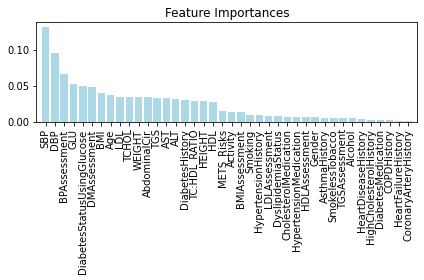

In [219]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X.columns[:]

forest = RandomForestClassifier(n_estimators=10,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_resampled, y_resampled)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_resampled.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 41, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_resampled.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_resampled.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_resampled.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [220]:
for f in range(16):
    print("%2d) %-*s %f" % (f + 1, 16, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
    import_f = []
for f in range(16):
    import_f.append(feat_labels[indices[f]])

    
print("\n the top 15 important features are %s" %import_f)

 1) SBP              0.131339
 2) DBP              0.095699
 3) BPAssessment     0.066102
 4) GLU              0.052337
 5) DiabetesStatusUsingGlucose 0.049556
 6) DMAssessment     0.047938
 7) BMI              0.039822
 8) Age              0.036591
 9) LDL              0.034779
10) TCHOL            0.034212
11) WEIGHT           0.034091
12) AbdominalCir     0.033597
13) TGS              0.033418
14) AST              0.032835
15) ALT              0.031192
16) DiabetesHistory  0.029300

 the top 15 important features are ['SBP', 'DBP', 'BPAssessment', 'GLU', 'DiabetesStatusUsingGlucose', 'DMAssessment', 'BMI', 'Age', 'LDL', 'TCHOL', 'WEIGHT', 'AbdominalCir', 'TGS', 'AST', 'ALT', 'DiabetesHistory']


In [221]:
X_resampled=pd.DataFrame(X_resampled,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [222]:
cols=['SBP', 'DBP', 'BPAssessment', 'GLU', 'BMI', 'TGS', 'Age', 'TCHOL', 'AST', 'LDL', 'ALT', 'WEIGHT', 'DMAssessment', 'AbdominalCir', 'METS_Risks', 'DiabetesStatusUsingGlucose']
X_resampled=X_resampled[cols]
X_test=X_test[cols]

In [223]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_resampled = mms.fit_transform(X_resampled)
X_test = mms.fit_transform(X_test)

# MODEL BUILDING 

**LOGISTIC REGRESSION**

In [224]:
def lr_fit(X_resampled, y_resampled,X_test,y_test):
    lr = LogisticRegression(C=100, max_iter= 300,penalty= 'l2')
    clf = lr.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    y_score = lr.decision_function(X_test)
    ROC_decison_function(y_test, y_score)

**SUPPORT VECTOR MACHINE**

In [225]:
def svm_rbf_fit(X_resampled, y_resampled,X_test,y_test):
    svm_rbf = SVC(kernel='linear', C=10,gamma=0.001,probability=True)
    clf = svm_rbf.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    y_score = svm_rbf.decision_function(X_test)
    ROC_decison_function(y_test, y_score)

**K NEAREST NEIGHBOURS**

In [226]:
def knn_fit(X_resampled, y_resampled,X_test,y_test):
    knn = KNeighborsClassifier(n_neighbors = 5,p=3,weights='distance')
    clf = knn.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    #y_score = clf.predict_proba(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_No_decision_function(y_test, clf_predicted)

**DECISION TREE**

In [227]:
def dt_fit(X_resampled, y_resampled,X_test,y_test):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
    clf = dt.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

**RANDOM FOREST**

In [228]:
def forest_fit(X_resampled, y_resampled,X_test,y_test):
    forest = RandomForestClassifier(n_estimators=13,random_state=0,n_jobs=-1)
    clf = forest.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

**GAUSSIAN NAIVE BAYES**

In [229]:
def nb_fit(X_resampled, y_resampled,X_test,y_test):
    nb = GaussianNB()
    clf = nb.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

**GRADIENT BOOSTING TREE**

In [230]:
from sklearn.ensemble import GradientBoostingClassifier
def Gradient_Boosting_fit(X_resampled, y_resampled,X_test,y_test):
    clf = GradientBoostingClassifier().fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

# MODEL EVALUATION METRICS

**CONFUSION MATRIX**

In [231]:
def ConfusionMatrix_Report(y_test,y_predicted):  
    confusion = confusion_matrix(y_test, y_predicted)
    ACC=accuracy_score(y_test, y_predicted)
    Precision=precision_score(y_test, y_predicted)
    Recall=recall_score(y_test, y_predicted)
    F1=f1_score(y_test, y_predicted)
    print('---Confusion Matrix---\n', confusion)
    print('\n   Accuracy: {:.2f}'.format(ACC))
    print('\n   Precision: {:.2f}'.format(Precision))
    print('\n   Recall: {:.2f}'.format(Recall))
    print('\n   F1: {:.2f}'.format(F1))
    print('---Classification Report---')
    print('\n   \n', 
    classification_report(y_test, y_predicted, target_names = ['not 1', '1']))
    print("Metric ")
    print('% 0.2f' % Recall,'% 0.2f' % F1,'% 0.2f' % Precision,'% 0.2f' % ACC)

**RECIEVER OPERATING CHARACTERSTIC CURVE**

In [232]:
def ROC_decison_function(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    print('% 0.2f' %roc_auc)
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=3, label='(AUC = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('classifier ROC curve )', fontsize=16)
    plt.legend(loc='riht', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

In [233]:
def ROC_No_decision_function(y_test, clf_predicted):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,clf_predicted)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('% 0.2f' %roc_auc)
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(false_positive_rate, true_positive_rate,lw=3, label='(AUC = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('classifier ROC curve )', fontsize=16)
    plt.legend(loc='right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

# MODEL TRAINING / TESTING - BEFORE TUNING

-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[23897 13232]
 [  229   796]]

   Accuracy: 0.65

   Precision: 0.06

   Recall: 0.78

   F1: 0.11
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.64      0.78     37129
           1       0.06      0.78      0.11      1025

    accuracy                           0.65     38154
   macro avg       0.52      0.71      0.44     38154
weighted avg       0.97      0.65      0.76     38154

Metric 
 0.78  0.11  0.06  0.65
 0.71


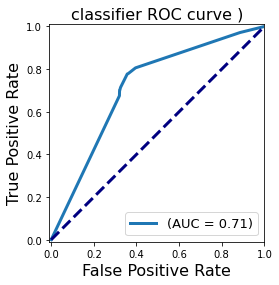

-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[18059 19070]
 [  165   860]]

   Accuracy: 0.50

   Precision: 0.04

   Recall: 0.84

   F1: 0.08
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.49      0.65     37129
           1       0.04      0.84      0.08      1025

    accuracy                           0.50     38154
   macro avg       0.52      0.66      0.37     38154
weighted avg       0.97      0.50      0.64     38154

Metric 
 0.84  0.08  0.04  0.50
 0.80


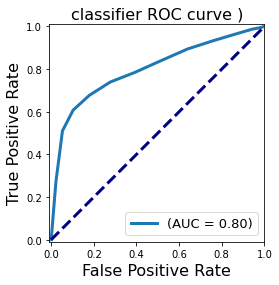

--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[11725 25404]
 [   93   932]]

   Accuracy: 0.33

   Precision: 0.04

   Recall: 0.91

   F1: 0.07
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.32      0.48     37129
           1       0.04      0.91      0.07      1025

    accuracy                           0.33     38154
   macro avg       0.51      0.61      0.27     38154
weighted avg       0.97      0.33      0.47     38154

Metric 
 0.91  0.07  0.04  0.33
 0.82


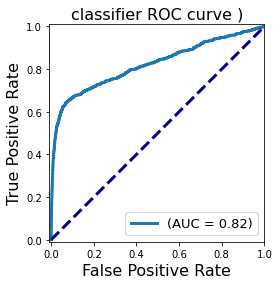

--------------------------------------------Support Vector Machine-------------------------------------
---Confusion Matrix---
 [[16531 20598]
 [  143   882]]

   Accuracy: 0.46

   Precision: 0.04

   Recall: 0.86

   F1: 0.08
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.45      0.61     37129
           1       0.04      0.86      0.08      1025

    accuracy                           0.46     38154
   macro avg       0.52      0.65      0.35     38154
weighted avg       0.97      0.46      0.60     38154

Metric 
 0.86  0.08  0.04  0.46
 0.82


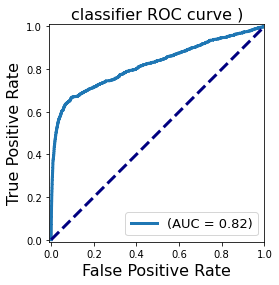

-------------------------------------------KNN--------------------------------------------
---Confusion Matrix---
 [[30174  6955]
 [  301   724]]

   Accuracy: 0.81

   Precision: 0.09

   Recall: 0.71

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.81      0.89     37129
           1       0.09      0.71      0.17      1025

    accuracy                           0.81     38154
   macro avg       0.54      0.76      0.53     38154
weighted avg       0.97      0.81      0.87     38154

Metric 
 0.71  0.17  0.09  0.81
 0.76


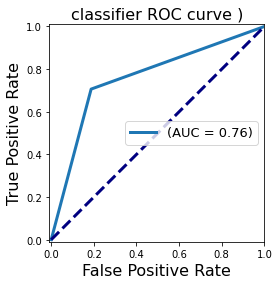

-------------------------------------------Naive Bayes--------------------------------------------
---Confusion Matrix---
 [[23597 13532]
 [  210   815]]

   Accuracy: 0.64

   Precision: 0.06

   Recall: 0.80

   F1: 0.11
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.64      0.77     37129
           1       0.06      0.80      0.11      1025

    accuracy                           0.64     38154
   macro avg       0.52      0.72      0.44     38154
weighted avg       0.97      0.64      0.76     38154

Metric 
 0.80  0.11  0.06  0.64
 0.82


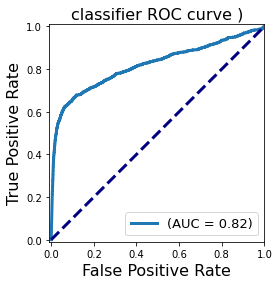

-------------------------------------------Gradient Boosting Tree--------------------------------------------
---Confusion Matrix---
 [[24849 12280]
 [  233   792]]

   Accuracy: 0.67

   Precision: 0.06

   Recall: 0.77

   F1: 0.11
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.67      0.80     37129
           1       0.06      0.77      0.11      1025

    accuracy                           0.67     38154
   macro avg       0.53      0.72      0.46     38154
weighted avg       0.97      0.67      0.78     38154

Metric 
 0.77  0.11  0.06  0.67
 0.81


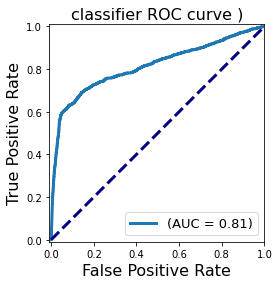

In [234]:
print("-------------------------------------------Decision Tree--------------------------------------------")
dt_fit(X_resampled, y_resampled,X_test,y_test)
print("-------------------------------------------Random Forest--------------------------------------------")
forest_fit(X_resampled, y_resampled,X_test,y_test)
print("--------------------------------------------Logistic Regression---------------------------------------")
lr_fit(X_resampled, y_resampled,X_test,y_test)
print("--------------------------------------------Support Vector Machine-------------------------------------")
svm_rbf_fit(X_resampled, y_resampled,X_test,y_test)
print("-------------------------------------------KNN--------------------------------------------")
knn_fit(X_resampled, y_resampled,X_test,y_test)
print("-------------------------------------------Naive Bayes--------------------------------------------")
nb_fit(X_resampled, y_resampled,X_test,y_test)
print("-------------------------------------------Gradient Boosting Tree--------------------------------------------")
Gradient_Boosting_fit(X_resampled, y_resampled,X_test,y_test)

# MODEL HYPERPARAMETER TUNING

**TUNING SUPPORT VECTOR MACHINE**

In [235]:
clf = SVC()
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel' : ['linear', 'rbf'],
          'C':[0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('testing set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

# alternative metric to optimize over grid parameters: F-1 socore
grid_clf_f1 = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'f1')
grid_clf_f1.fit(X_resampled, y_resampled)
y_decision_fn_scores_f1 = grid_clf_f1.decision_function(X_test) 


print('Grid best parameter (max. F1): ', grid_clf_f1.best_params_)
print('Grid best score F1: ', grid_clf_f1.best_score_)


Grid best parameter (max. accuracy):  {'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}
Grid best score (accuracy):  0.7974228981833544
testing set AUC:  0.8209748871600595
Grid best parameter (max. AUC):  {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Grid best score (AUC):  0.8296202055834261
Grid best parameter (max. F1):  {'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}
Grid best score F1:  0.7677900805116732


**TUNING LOGISTIC REGRESSION**

In [236]:
from sklearn.linear_model import LogisticRegression
    
clf= LogisticRegression()
grid_values = {'max_iter': [100, 200, 300, 400,500,600,700,800,900,1000],'C': [0.001,0.01, 0.1, 1, 10, 100,1000], 'penalty': ['l1', 'l2']}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Testing set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

# alternative metric to optimize over grid parameters: F-1 socore
grid_clf_f1 = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'f1')
grid_clf_f1.fit(X_resampled, y_resampled)
y_decision_fn_scores_f1 = grid_clf_f1.decision_function(X_test) 


print('Grid best parameter (max. F1): ', grid_clf_f1.best_params_)
print('Grid best score F1: ', grid_clf_f1.best_score_)

Grid best parameter (max. accuracy):  {'C': 100, 'max_iter': 100, 'penalty': 'l2'}
Grid best score (accuracy):  0.7693282636248416
Testing set AUC:  0.8226680216437221
Grid best parameter (max. AUC):  {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Grid best score (AUC):  0.824443941114704
Grid best parameter (max. F1):  {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Grid best score F1:  0.7569255375598659


**TUNING K NEAREST NEIGHBOURS**

In [237]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11], 
          'p':[1, 2, 3, 4],'weights':['uniform', 'distance']}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 
 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 

print('test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

# alternative metric to optimize over grid parameters: F-1 socore
grid_clf_f1 = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'f1')
grid_clf_f1.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 



print('Grid best parameter (max. F1): ', grid_clf_f1.best_params_)
print('Grid best score F1: ', grid_clf_f1.best_score_)


Grid best parameter (max. accuracy):  {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Grid best score (accuracy):  0.7853823405154202
test set AUC:  0.820973363139325
Grid best parameter (max. AUC):  {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Grid best score (AUC):  0.8220766849632382
Grid best parameter (max. F1):  {'n_neighbors': 11, 'p': 3, 'weights': 'uniform'}
Grid best score F1:  0.7581547958835179


**TUNING DECISION TREE**

In [238]:
from sklearn.tree import DecisionTreeClassifier

depth= np.arange(1,20,1)
clf = DecisionTreeClassifier()
grid_values = {'criterion':['entropy','gini'],'max_depth': depth}
# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 


print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 


print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

# alternative metric to optimize over grid parameters: F-1 socore
grid_clf_f1 = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'f1')
grid_clf_f1.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 



print('Grid best parameter (max. F1): ', grid_clf_f1.best_params_)
print('Grid best score F1: ', grid_clf_f1.best_score_)

Grid best parameter (max. accuracy):  {'criterion': 'gini', 'max_depth': 3}
Grid best score (accuracy):  0.7976341360371779
Test set AUC:  0.7977536328515806
Grid best parameter (max. AUC):  {'criterion': 'entropy', 'max_depth': 3}
Grid best score (AUC):  0.8329804670578715
Grid best parameter (max. F1):  {'criterion': 'gini', 'max_depth': 3}
Grid best score F1:  0.76891806306634


**TUNING RANDOM FOREST**

In [239]:
clf =  RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 40, num=20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 20, num = 10)]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
grid_values = random_grid
# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
#y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 


print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
#y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 


#print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 27}
Grid best score (accuracy):  0.7989015631601183
Grid best parameter (max. AUC):  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 28}
Grid best score (AUC):  0.8426775964184342


**TUNING GRADIENT BOOSTING TREE**

In [240]:
#'min_samples_leaf':range(100,1000,10),'max_features':range(2,16,2),\'min_samples_split':range(1000,2000,10),\learning rate:
clf =  GradientBoostingClassifier()
grid_values={'n_estimators':range(10,100,10),'max_depth':range(3,10,2),\
        'learning_rate':[0.001,0.01,0.1,0.2,0.3,0.4,0.5]}
# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv=3)
grid_clf_acc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, cv=3,scoring = 'roc_auc')
grid_clf_auc.fit(X_resampled, y_resampled)
y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test)[:, 1] 


print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}
Grid best score (accuracy):  0.7991128010139418
Test set AUC:  0.8217729090862511
Grid best parameter (max. AUC):  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Grid best score (AUC):  0.8449037596054323


# MODEL TRAINING / TESTING - AFTER HYPERPARAMETER TUNING

**FITTING LOGISTIC REGRESSION**

In [241]:
def lr_fit(X_resampled, y_resampled,X_test,y_test):
    lr = LogisticRegression(C=1000, max_iter= 600,penalty= 'l2')
    clf = lr.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    y_score_lr = lr.decision_function(X_test)
    ROC_decison_function(y_test, y_score=y_score_lr)
    X_resampled=pd.DataFrame(X_resampled,columns=cols)
    print("no inverse scaled coefficient for lr:",clf.coef_)
    feature_importance = abs(clf.coef_[0])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    featfig = plt.figure()
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(X_resampled.columns)[sorted_idx], fontsize=8)
    featax.set_xlabel('Relative Feature Importance')
    plt.tight_layout()   
    plt.show()

---Confusion Matrix---
 [[11605 25524]
 [   93   932]]

   Accuracy: 0.33

   Precision: 0.04

   Recall: 0.91

   F1: 0.07
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.31      0.48     37129
           1       0.04      0.91      0.07      1025

    accuracy                           0.33     38154
   macro avg       0.51      0.61      0.27     38154
weighted avg       0.97      0.33      0.46     38154

Metric 
 0.91  0.07  0.04  0.33
 0.82


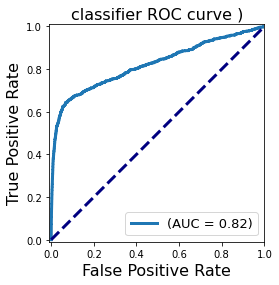

no inverse scaled coefficient for lr: [[ 8.60979648  5.57540235  0.91958582 11.8550357  -3.56706082  0.18685637
  -1.47664795  1.12588521  5.42786748 -0.61850105  0.79569399 -3.4739576
   1.58958653  5.39135055 -0.45381815 -1.28483193]]


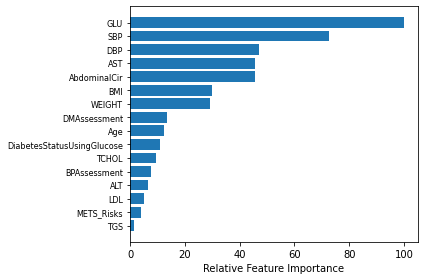

In [242]:
lr_fit(X_resampled, y_resampled,X_test,y_test)

**FITTING K NEAREST NEIGHBOURS**

In [243]:
def knn_fit(X_resampled, y_resampled,X_test,y_test):
    knn = KNeighborsClassifier(n_neighbors = 11,p=2,weights='distance')
    clf = knn.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_No_decision_function(y_test, clf_predicted)

---Confusion Matrix---
 [[32131  4998]
 [  309   716]]

   Accuracy: 0.86

   Precision: 0.13

   Recall: 0.70

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.87      0.92     37129
           1       0.13      0.70      0.21      1025

    accuracy                           0.86     38154
   macro avg       0.56      0.78      0.57     38154
weighted avg       0.97      0.86      0.90     38154

Metric 
 0.70  0.21  0.13  0.86
 0.78


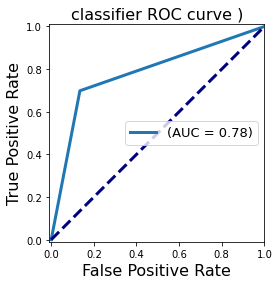

In [244]:
knn_fit(X_resampled, y_resampled,X_test,y_test)

**FITTING DECISION TREE**

In [245]:
def dt_fit(X_resampled, y_resampled,X_test,y_test):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=6)
    clf = dt.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)
    print("feature importance for dt:",clf.feature_importances_)
    feature_importance=clf.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    featfig = plt.figure()
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    X_resampled=pd.DataFrame(X_resampled,columns=cols)
    featax.set_yticklabels(np.array(X_resampled.columns)[sorted_idx], fontsize=8)
    featax.set_xlabel('Relative Feature Importance')
    plt.tight_layout()   
    plt.show()

---Confusion Matrix---
 [[23660 13469]
 [  247   778]]

   Accuracy: 0.64

   Precision: 0.05

   Recall: 0.76

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.64      0.78     37129
           1       0.05      0.76      0.10      1025

    accuracy                           0.64     38154
   macro avg       0.52      0.70      0.44     38154
weighted avg       0.96      0.64      0.76     38154

Metric 
 0.76  0.10  0.05  0.64
 0.70


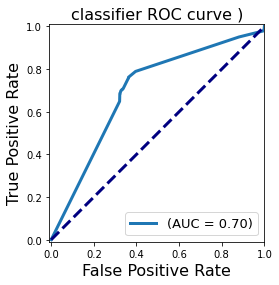

feature importance for dt: [0.01881849 0.02339624 0.49603378 0.03738466 0.01849979 0.01105817
 0.00657845 0.0052793  0.01526257 0.00722522 0.0094407  0.01297154
 0.33408742 0.00396366 0.         0.        ]


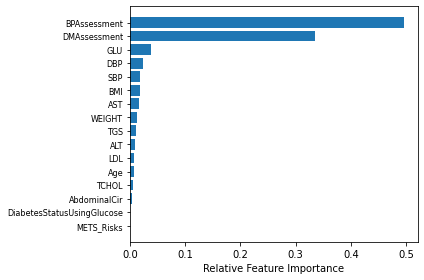

In [246]:
dt_fit(X_resampled, y_resampled,X_test,y_test)

**FITTING RANDOM FOREST**

In [247]:
def forest_fit(X_resampled, y_resampled,X_test,y_test):
    forest = RandomForestClassifier(bootstrap= True, max_depth=10, max_features='sqrt', n_estimators=35,n_jobs=-1)
    clf = forest.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

---Confusion Matrix---
 [[21549 15580]
 [  197   828]]

   Accuracy: 0.59

   Precision: 0.05

   Recall: 0.81

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.58      0.73     37129
           1       0.05      0.81      0.09      1025

    accuracy                           0.59     38154
   macro avg       0.52      0.69      0.41     38154
weighted avg       0.97      0.59      0.71     38154

Metric 
 0.81  0.09  0.05  0.59
 0.82


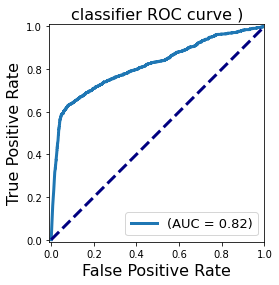

In [248]:
forest_fit(X_resampled, y_resampled,X_test,y_test)

**FITTING GRADIENT BOOSTING TREE**

---Confusion Matrix---
 [[23123 14006]
 [  217   808]]

   Accuracy: 0.63

   Precision: 0.05

   Recall: 0.79

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.62      0.76     37129
           1       0.05      0.79      0.10      1025

    accuracy                           0.63     38154
   macro avg       0.52      0.71      0.43     38154
weighted avg       0.97      0.63      0.75     38154

Metric 
 0.79  0.10  0.05  0.63
 0.81


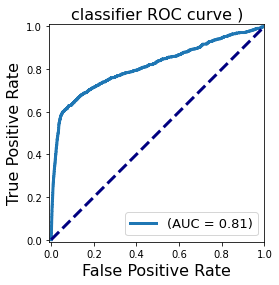

In [249]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=60).fit(X_resampled, y_resampled)
clf_predicted = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:, 1]
ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
ROC_decison_function(y_test, y_score)

In [250]:
def feature_importances_(self):
    total_sum = np.zeros((self.n_features, ), dtype=np.float64)
    for tree in self.estimators_:
        total_sum += tree.feature_importances_ 
    importances = total_sum / len(self.estimators_)
    return importances

 1) BPAssessment      0.456419
 2) DMAssessment      0.293025
 3) GLU               0.056171
 4) DBP               0.030659
 5) BMI               0.028314
 6) SBP               0.028256
 7) AST               0.020684
 8) Age               0.018476
 9) TCHOL             0.012897
10) METS_Risks        0.010457
11) WEIGHT            0.010335
12) TGS               0.010002
13) ALT               0.008747
14) LDL               0.007919
15) AbdominalCir      0.007363
16) DiabetesStatusUsingGlucose 0.000275


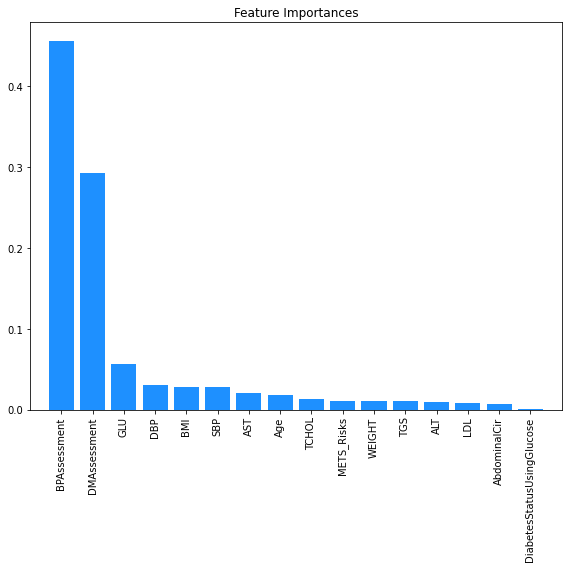

<Figure size 432x288 with 0 Axes>

In [251]:
clf = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=60).fit(X_resampled, y_resampled)
clf_predicted = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:, 1]
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]
X_resampled= pd.DataFrame(X_resampled)
X_resampled.columns=cols
feat_labels=X_resampled.columns
for f in range(X_test.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 17, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
plt.figure(figsize=(8,8), facecolor='white')
plt.title('Feature Importances')
plt.bar(range(X_resampled.shape[1]), 
        importances[indices],
        color='dodgerblue', 
        align='center')

plt.xticks(range(X_resampled.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_resampled.shape[1]])
plt.tight_layout()
plt.show()
plt.savefig("Feature_Important_GB")

**FITTING SUPPORT VECTOR MACHINE**

In [252]:
def svm_rbf_fit(X_resampled, y_resampled,X_test,y_test):
    svm_rbf = SVC(kernel='rbf', C=10,gamma=1,probability=True)
    clf = svm_rbf.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    y_score = svm_rbf.decision_function(X_test)
    ROC_decison_function(y_test, y_score)

---Confusion Matrix---
 [[33691  3438]
 [  329   696]]

   Accuracy: 0.90

   Precision: 0.17

   Recall: 0.68

   F1: 0.27
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.91      0.95     37129
           1       0.17      0.68      0.27      1025

    accuracy                           0.90     38154
   macro avg       0.58      0.79      0.61     38154
weighted avg       0.97      0.90      0.93     38154

Metric 
 0.68  0.27  0.17  0.90
 0.83


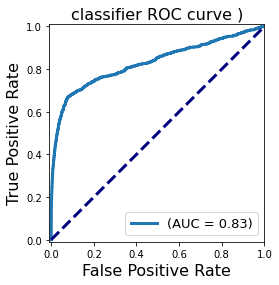

In [253]:
svm_rbf_fit(X_resampled, y_resampled,X_test,y_test)

# MODEL EVALUATION

**COMBINING ROC CURVE TO MAKE EVALUATIONt**

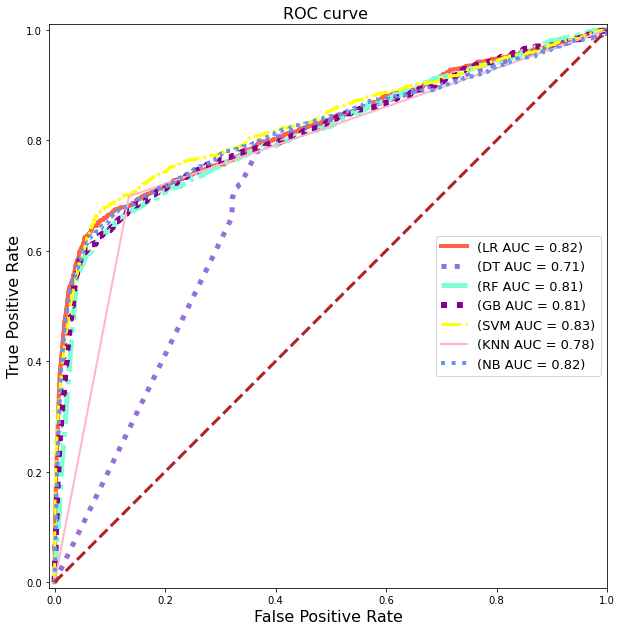

<Figure size 432x288 with 0 Axes>

In [254]:
#lr
lr = LogisticRegression(C=1000, max_iter= 600,penalty= 'l2')
clf_lr = lr.fit(X_resampled, y_resampled)
clf_predicted_lr = clf_lr.predict(X_test)
y_score_lr = lr.decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
#dt
dt = DecisionTreeClassifier(criterion='gini', max_depth=6)
clf_dt = dt.fit(X_resampled, y_resampled)
clf_predicted_dt = clf_dt.predict(X_test)
y_score_dt = clf_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
#rf
forest = RandomForestClassifier(bootstrap= True, max_depth=10, max_features='sqrt', n_estimators=35,n_jobs=-1)
clf_rf = forest.fit(X_resampled, y_resampled)
clf_predicted_rf = clf_rf.predict(X_test)
y_score_rf= clf_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
# gb
clf_gb = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=60).fit(X_resampled, y_resampled)
clf_predicted_gb = clf_gb.predict(X_test)
y_score_gb = clf_gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
#svm
svm_rbf = SVC(kernel='rbf', C=10,gamma=1,probability=True)
clf_svm = svm_rbf.fit(X_resampled, y_resampled)
clf_predicted_svm = clf_svm.predict(X_test)
y_score_svm = svm_rbf.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
#knn
knn = KNeighborsClassifier(n_neighbors = 11,p=2,weights='distance')
clf_knn = knn.fit(X_resampled, y_resampled)
clf_predicted_knn = clf_knn.predict(X_test)
false_positive_rate_knn,true_positive_rate_knn,thresholds=roc_curve(y_test,clf_predicted_knn)
roc_auc_knn=auc(false_positive_rate_knn, true_positive_rate_knn)
#nb
nb = GaussianNB()
clf_nb = nb.fit(X_resampled, y_resampled)
clf_predicted_nb = clf_nb.predict(X_test)
y_score_nb = clf_nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(10,12))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=4, color='tomato',linestyle='-',label='(LR AUC = {:0.2f})'.format(roc_auc_lr))
plt.plot(fpr_dt, tpr_dt, lw=5,color='mediumpurple',linestyle=':',label='(DT AUC = {:0.2f})'.format(roc_auc_dt))
plt.plot(fpr_rf, tpr_rf, lw=5,color='aquamarine',linestyle='-.',label='(RF AUC = {:0.2f})'.format(roc_auc_rf))
plt.plot(fpr_gb, tpr_gb, lw=6,color='darkmagenta',linestyle=':',label='(GB AUC = {:0.2f})'.format(roc_auc_gb))
plt.plot(fpr_svm, tpr_svm, lw=3,color='yellow',linestyle='-.',label='(SVM AUC = {:0.2f})'.format(roc_auc_svm))
plt.plot(false_positive_rate_knn,true_positive_rate_knn, linestyle='-',lw=2,color='lightpink',label='(KNN AUC = {:0.2f})'.format(roc_auc_knn))
plt.plot(fpr_nb, tpr_nb, lw=4,color='cornflowerblue',linestyle=':',label='(NB AUC = {:0.2f})'.format(roc_auc_nb))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve ', fontsize=16)
plt.legend(loc='right', fontsize=13)
plt.plot([0, 1], [0, 1], color='firebrick', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
plt.savefig('AUC_Optimized_1.png')
